### Задание 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

##### Загружаем "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

data = boston.data

target = boston.target

feature_names = boston.feature_names

##### Создаем датафреймы X и y из "Boston House Prices dataset"

In [4]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


##### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Масштабируйте данные с помощью StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

##### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

##### Постройте диаграмму рассеяния на этих данных

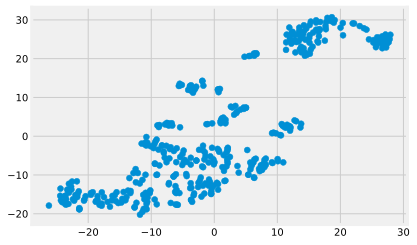

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

##### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

##### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами

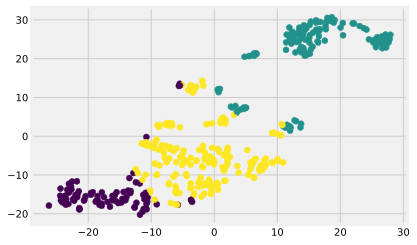

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

##### Вычислите средние значения price и CRIM в разных кластерах

In [12]:
print("Средние значения 'price'")
print("Кластер 0:", y_train[labels_train == 0].mean())
print("Кластер 1:", y_train[labels_train == 1].mean())
print("Кластер 2:", y_train[labels_train == 2].mean())
print("Средние значения 'CRIM'")
print("Кластер 0:", X_train.loc[labels_train == 0, 'CRIM'].mean())
print("Кластер 1:", X_train.loc[labels_train == 1, 'CRIM'].mean())
print("Кластер 2:", X_train.loc[labels_train == 2, 'CRIM'].mean())

Средние значения 'price'
Кластер 0: price    27.788372
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    24.958115
dtype: float64
Средние значения 'CRIM'
Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


### *Задание 3

##### Примените модель KMeans, построенную в предыдущем задании,к данным из тестового набора.

In [13]:
labels_test = kmeans.predict(X_test_scaled)

##### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных

In [14]:
print("Средние значения 'price'")
print("Кластер 0:", y_test[labels_test == 0].mean())
print("Кластер 1:", y_test[labels_test == 1].mean())
print("Кластер 2:", y_test[labels_test == 2].mean())
print("Средние значения 'CRIM'")
print("Кластер 0:", X_test.loc[labels_test == 0, 'CRIM'].mean())
print("Кластер 1:", X_test.loc[labels_test == 1, 'CRIM'].mean())
print("Кластер 2:", X_test.loc[labels_test == 2, 'CRIM'].mean())

Средние значения 'price'
Кластер 0: price    31.35
dtype: float64
Кластер 1: price    16.437143
dtype: float64
Кластер 2: price    21.860784
dtype: float64
Средние значения 'CRIM'
Кластер 0: 0.062060000000000004
Кластер 1: 10.165531142857143
Кластер 2: 0.26607882352941176
